# Part I - (Bike Share Dataset Exploration)
## by Saad Salim Albadea

## Introduction
> Bike Share is an application connected with multiple bike stations where people can rent a bike for a short, or long, trip.
The idea of this application recevied a huge, positive impact from people because it solved two problems: 1- It made work, or school, drives more fun and with no gridlocks. 2- Driving with a bike is much more healthy. As a result, people arrive to work more excited. In this project, I am going to uncover more worth-sharing information about the application in terms of users, stations, drive durations.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set()
%matplotlib inline

In [2]:
#Load data
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

> (183412, 16)

### What is/are the main feature(s) of interest in your dataset?

> This is a bike-sharing application that provides transportation service using their application-bound bike which enables its user to drive anywhere within the purchesed seconds. I have interest in this dataset because it tells me how many times do people fall in a situation where they need a bike to travel.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Use duration, start and end time, starting point, ending point, bike id, user type, user age, and user gender

## Univariate Exploration


After observing the dataset, I decided that there is a need to categorize birth_year column. After that, I will do a pie plot to the new column.

In [5]:
#Making a categorical column of birth_year: -
stages = ['Old', 'Adult', 'Young']
df['stage'] = pd.cut(df['member_birth_year'], bins= [1878, 1963, 1993, 2023], labels= stages)

In [6]:
#setting default colors: -
base_color = sb.color_palette()[0]
brown = sb.color_palette()[5]

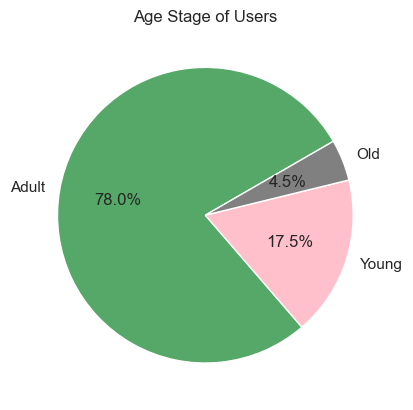

In [7]:
#Pie chart of users` age stage
stage_count = df['stage'].value_counts()

plt.pie(stage_count, labels = stage_count.index, colors=['g', 'pink', 'gray'], autopct='%1.1f%%', startangle=30);
plt.title('Age Stage of Users');

While cosidering that this is a bike application, I have to say I didn't expect Young people would be that low. This would suggest that people use the application to go to work or appointments rather than having fun.

Let's now look at gender bar plot to figure what gender use Bike Share the most.

In [8]:
#Count plot function: -
def count_plot(data1, var, c, title1):
    sb.countplot(data = data1, x = var, color = c)
    plt.title(title1)

    

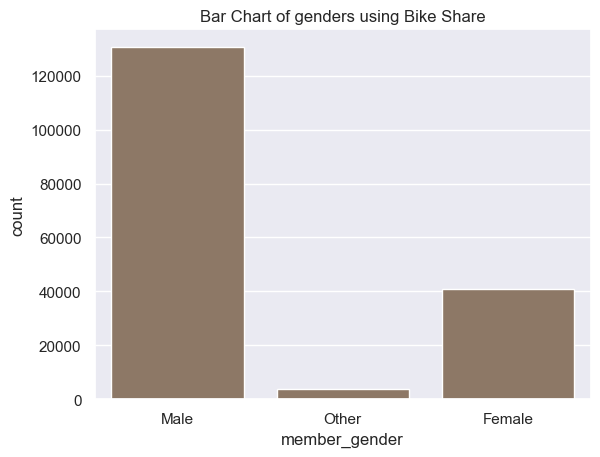

In [9]:
#bar plot to show gender of users: -

count_plot(df, 'member_gender', brown, 'Bar Chart of genders using Bike Share')

The plot shows that males use Bike Share far more than other genders.

Next, I will look the difference between subscribers and customers in the same plot type

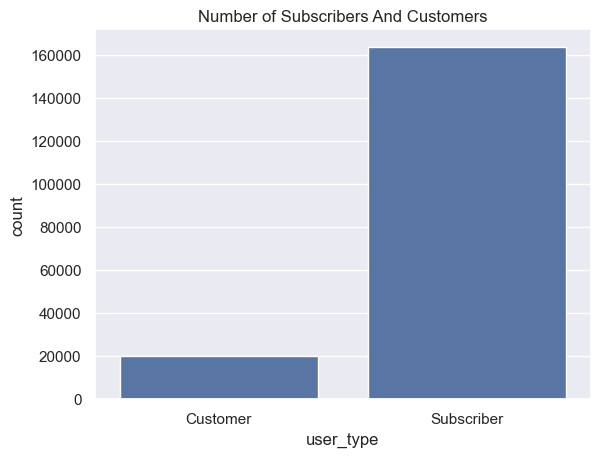

In [10]:
#bar plot to show user types: -

count_plot(df, 'user_type', base_color, 'Number of Subscribers And Customers')

The bar chart shows that Bike Share has much more subscribers than customers. From my understanding, customers use Bike Share in urgent cases only, while subscribers use Bike Share in a daiy base where they go to work or school every day because it is much more cheaper than paying for every trip for a whole month. The bar plot indicates that most of Bike Share users drive to work or school.

Let's now create a histogram which distributes travel durations for a better understanding.

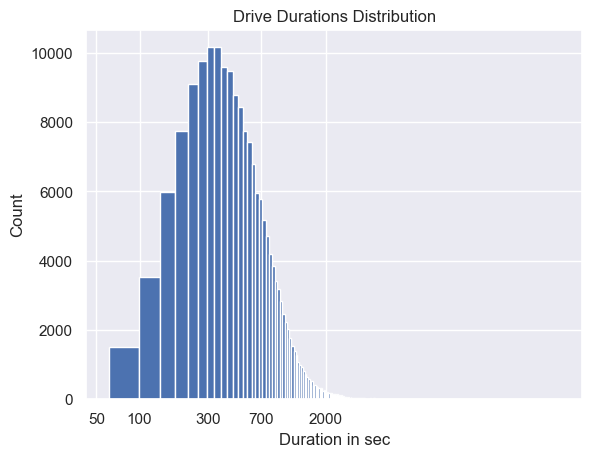

In [11]:
#histogram of travel durations: -

x_ticks = [50, 100, 300, 700, 2000]
plt.hist(df['duration_sec'], bins = 2200)
plt.xscale('log')
plt.xticks(x_ticks, x_ticks);
plt.title('Drive Durations Distribution');
plt.xlabel('Duration in sec')
plt.ylabel('Count');



The result indicates that people either subscribe to Bike Share when their workplace in nearby, or they use it to close down the distence to the train, or bus, station. This will be holded until further investegations.

In [12]:
df_strdate = df.copy()

df_strdate['start_time'] = df_strdate['start_time'].astype(str)

In [13]:
#setting up for the next plots by converting dtype to object to make the plots more clear: -

df_strdate['start_time'] = pd.to_datetime(df_strdate['start_time'], format='%Y-%m-%d %H:%M:%S')
df_strdate['start_time'] = df_strdate['start_time'].dt.strftime('%Y-%m-%d')

df_strdate['end_time'] = pd.to_datetime(df_strdate['end_time'], format='%Y-%m-%d %H:%M:%S')
df_strdate['end_time'] = df_strdate['end_time'].dt.strftime('%Y-%m-%d')

In [14]:
#to make sure the intended results have been applied: -

df_strdate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             183412 non-null  int64   
 1   start_time               183412 non-null  object  
 2   end_time                 183412 non-null  object  
 3   start_station_id         183215 non-null  float64 
 4   start_station_name       183215 non-null  object  
 5   start_station_latitude   183412 non-null  float64 
 6   start_station_longitude  183412 non-null  float64 
 7   end_station_id           183215 non-null  float64 
 8   end_station_name         183215 non-null  object  
 9   end_station_latitude     183412 non-null  float64 
 10  end_station_longitude    183412 non-null  float64 
 11  bike_id                  183412 non-null  int64   
 12  user_type                183412 non-null  object  
 13  member_birth_year        175147 non-null  fl

I think it would be interesting to track the days where Bike Share recorded the highest rent counts and compare it with the lowest ones. The result could lead to a better understanding of when do people need Bike Share the most.

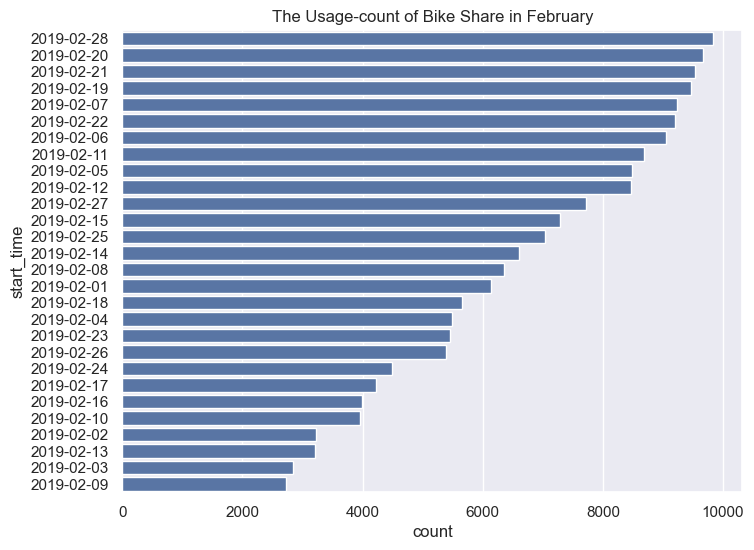

In [15]:
#horizontical countplot to make the dates easier to read: -

plt.figure(figsize = [8, 6])
sb.countplot(y=df_strdate['start_time'], order = df_strdate['start_time'].value_counts().index, color = base_color )
plt.title('The Usage-count of Bike Share in February');

The plot shows the highest amount of rents was in 28th day, while the lowest amount of rents was in 9th day.

Let's now look at the number of people who use Bike Share for the whole trip.

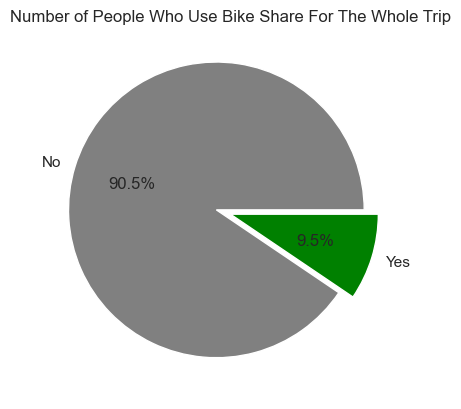

In [16]:
#Pie chart to plot bike_share for _all_trip: -

bike_share = df['bike_share_for_all_trip'].value_counts()

plt.pie(bike_share, labels = bike_share.index, colors = ['gray', 'green'], autopct='%1.1f%%', explode = [0.1, 0.0]);
plt.title('Number of People Who Use Bike Share For The Whole Trip');

As expected, 90% of people do not use Bike Share for the entire trip. People use Bike Share only to close down the distence to the train staion.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Only few transformations I had to do regarding dtype of date and converting birth year to a categorical column just to make it more clear.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> At first, I was a bit surprised that only 17% of Bike Share users are the youngies. I imagined a percentage around 30%, but after uncovering more details about the dataset the numbers have started to make sense.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [17]:
#In some plots, I figured it would be more clear to convert seconds into minutes since they are easier to render\refer. :-
df['duration_min'] = round(df['duration_sec'] / 60)
df_strdate['duration_min'] = df['duration_min']

In [18]:
most_min = df_strdate.groupby('start_time', as_index=False).mean().sort_values(by='duration_min', ascending=False).head(5)
most_min['start_time'] = most_min['start_time'].astype(str)

I will start to connect the relations between the variables with the following plot which shows the average minutes of drive among all users during a certain day. This is an important information. It shows the days where people use the application heavely whether for one long trip or multiple times during the day.

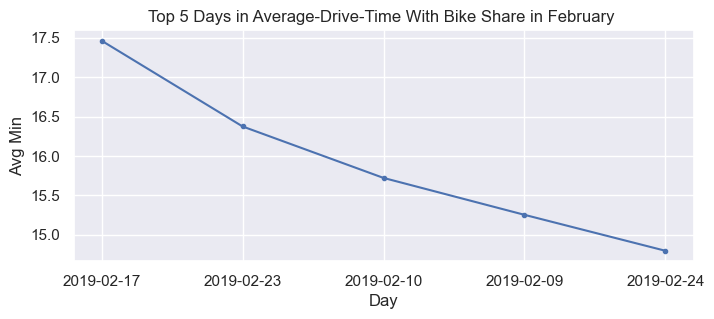

In [19]:
#Line Plot to show The top 5 days of average drive durations: -

plt.figure(figsize = [8, 3])
plt.plot(most_min['start_time'], most_min['duration_min'], marker='.');
plt.title('Top 5 Days in Average-Drive-Time With Bike Share in February ');
plt.xlabel('Day')
plt.ylabel('Avg Min');

As the line plot presents, the most day of average drive time is the 17th. This helps the company to track down the places of peek usage to provide more bikes in that erea. A lot more can be improved from this plot.

It is always helpful to plot the correlation map to find any unexpected relations between the variables. 

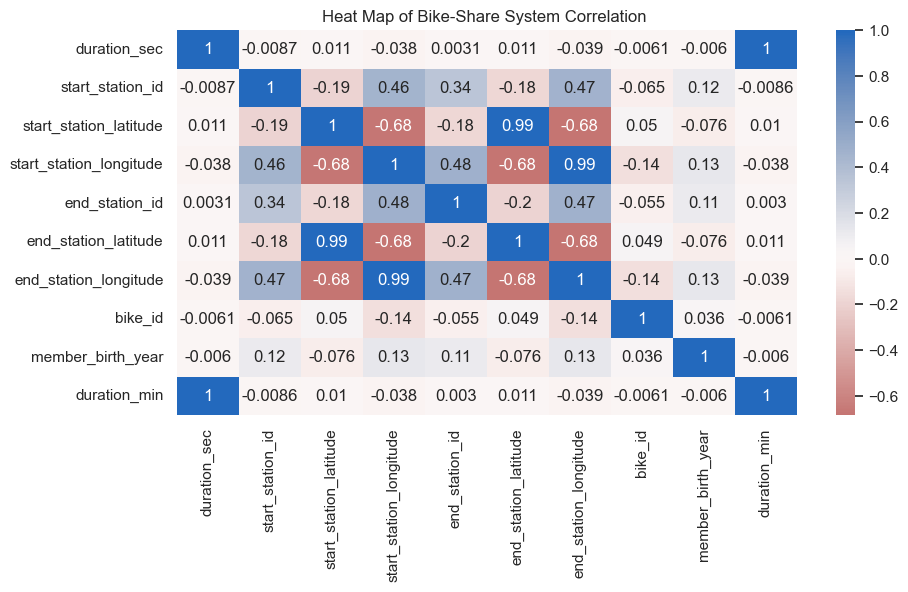

In [20]:
#General Heat Map for correlation to capture any worth-noticing relations.

plt.figure(figsize = [10, 5])
sb.heatmap(df.corr(), annot = True, cmap = 'vlag_r', center = 0);
plt.title('Heat Map of Bike-Share System Correlation ');

           

Since my dataset is almost fully categorical, I didn't expect much. There is almost no numeric correlation that can be found by the heatmap.

Previously, we understood that most users are adult subscribers, because they go to work using the application. Let's plot this foreknow information to make it more clear. We also could notice more facts from it.

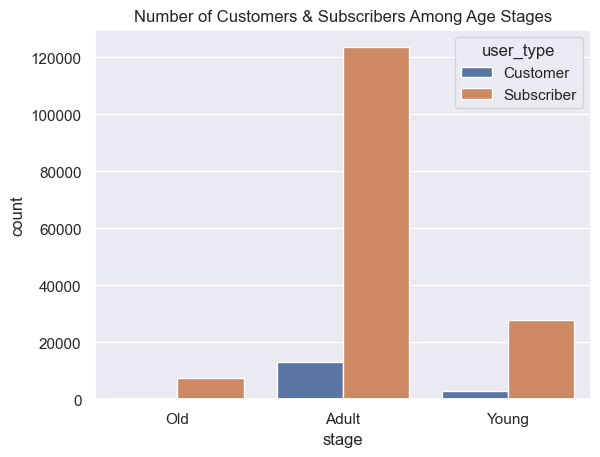

In [21]:
#Observing the distribution of customer, subscribers within different age stages: -
sb.countplot(data = df, x = 'stage', hue = 'user_type')
plt.title('Number of Customers & Subscribers Among Age Stages');

The result is not surprising. Adults are the most users. Plus, they probably use it in a daily base since they drive to work. They would also have the highest subscribe amount. Another thing worth mentioning, there are no customer Old people. Almost all Old people are subscribers. This could mean that there are some users who use the application as a daily excercise.

Moving on to the next observation, I will look for birth year distribution among all genders. The result could be used to consider changing the design of the bikes to fit the targeted gender in terms of size, color, and location. 

In [22]:
gndr_brth = df.copy()

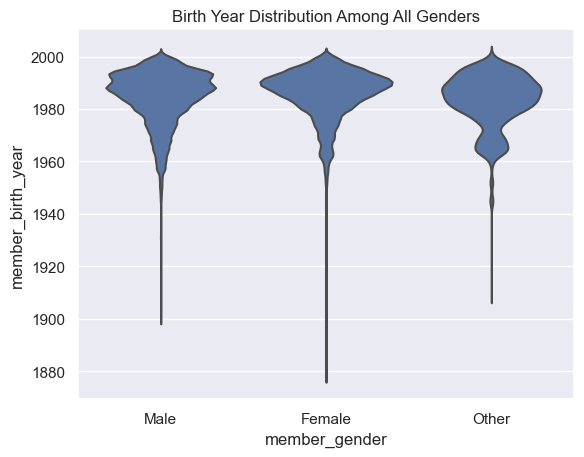

In [23]:
#Observing the distributions of ages between genders: -
catogs = ['Male', 'Female', 'Other']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=catogs)

gndr_brth['member_gender'] = gndr_brth['member_gender'].astype(vclasses);



sb.violinplot(data=gndr_brth, x='member_gender', y='member_birth_year', color = base_color, inner = None)
plt.title('Birth Year Distribution Among All Genders');

Generally, the differences aren't very high. It looks like there are more young males than females, but nothing is off limits except the little spike of Old people in Other genders.

After observing the birth years among genders, let's see the distribution of birth years to drive duration to figure out who drives more among them.

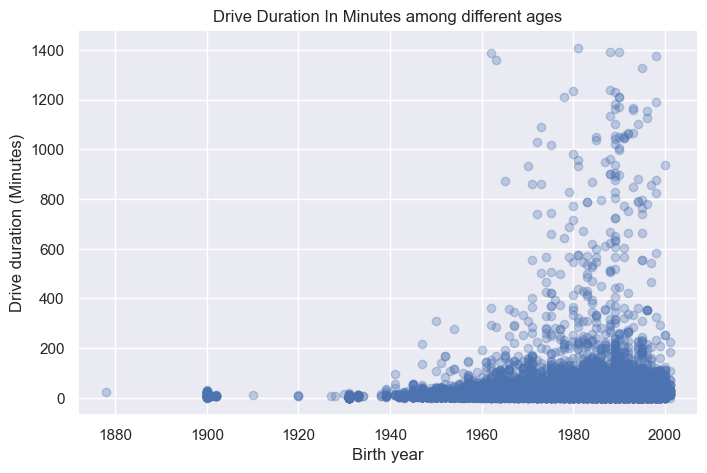

In [24]:
# Scatter plot
plt.figure(figsize = [8, 5])
plt.scatter(data = df, x = 'member_birth_year', y = 'duration_min', alpha = 0.3);
plt.ylabel('Drive duration (Minutes)')
plt.xlabel('Birth year')
plt.title('Drive Duration In Minutes among different ages');


There is an overlap due to the huge amount of data in the first few minutes of riding. However, the points seems to keep disappearing as the duration increases in below 1980 and after 1995, but the points are maintained in 1980-1993 area. This probably wasn't the best way to show the differences between the stages, but it's important to track users by their percise birth year rather than an improvided categorization.

Let's have a look at a more clear plot to focus on the differences between the stages.

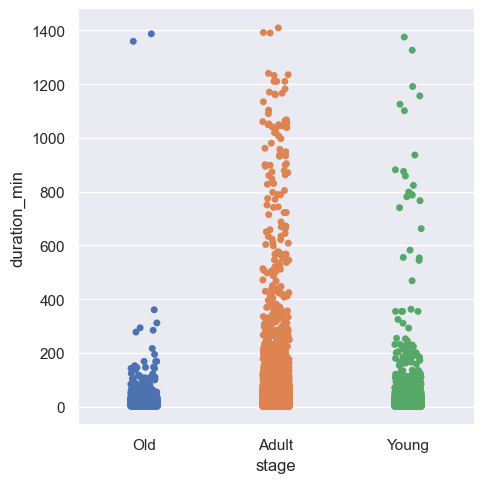

In [25]:
sb.catplot(data=df, x="stage", y="duration_min");

As I said before, unlike other stages, there are a considerable number of adults who use the application for a very long trips 

In [26]:
catogs2 = ['Old', 'Adult', 'Young']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=catogs2)

df['stage'] = df['stage'].astype(vclasses);

#Query to avoid Outliers to make the plot more clear: -
vio_plot60 = df.query('duration_min <= 60')
vio_plot45 = df.query('duration_min <= 45')
vio_plot30 = df.query('duration_min <= 30')
vio_plot15 = df.query('duration_min <= 15')
vio_plot5 = df.query('duration_min <= 5')

We can zoom in even more with the following plots where we track the distribution of duration in different duration covering. 

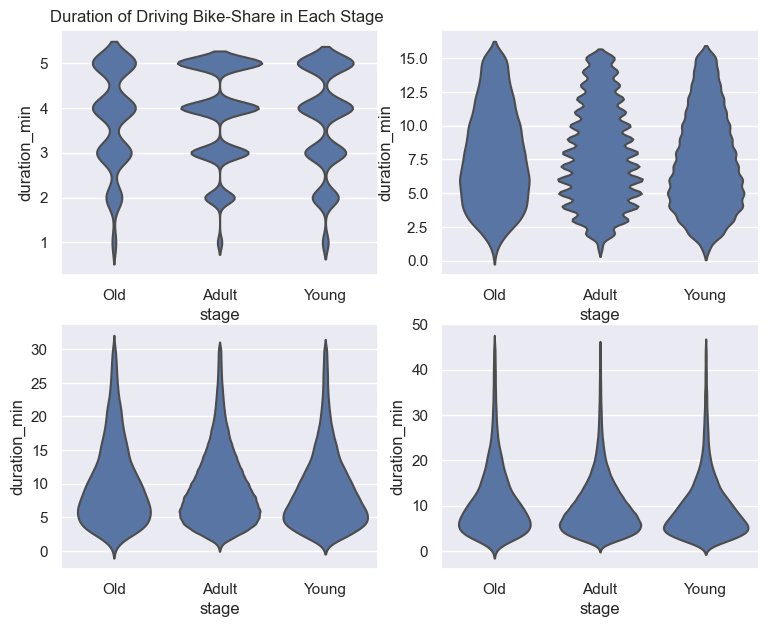

In [27]:
#Comparing Between Age Stages within different Drive Durations: -

plots = [vio_plot5, vio_plot15, vio_plot30, vio_plot45]
fig, axes = plt.subplots(2, 2, figsize = [9, 7])

sb.violinplot(data = plots[0], x = 'stage', y = 'duration_min', ax=axes[0,0], color = base_color, inner = None)
sb.violinplot(data = plots[1], x = 'stage', y = 'duration_min', ax=axes[0,1], color = base_color, inner = None)
sb.violinplot(data = plots[2], x = 'stage', y = 'duration_min', ax=axes[1,0], color = base_color, inner = None)
sb.violinplot(data = plots[3], x = 'stage', y = 'duration_min', ax=axes[1,1], color = base_color, inner = None);

axes[0,0].set_title('Duration of Driving Bike-Share in Each Stage ');



In [28]:
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  stage  duration_min  
0          Male                      No  Adult         870.0  
1           NaN                      No    NaN         709.0  
2          Male                      No  Adult        1031.0  
3         Other                      No  Adult         608.0  
4          Male                     Yes  Adult          26.0

In [29]:
avg_min = df.groupby('member_gender', as_index=False).mean().sort_values(by='duration_min', ascending=False)
avg_min

member_gender  duration_sec  start_station_id  start_station_latitude  \
2         Other    996.515334        152.867014               37.798435   
0        Female    779.070390        138.107046               37.780394   
1          Male    672.639069        138.894529               37.767047   

   start_station_longitude  end_station_id  end_station_latitude  \
2              -122.356042      150.676995             37.798305   
0              -122.356859      136.301630             37.780557   
1              -122.349437      136.305908             37.767259   

   end_station_longitude      bike_id  member_birth_year  duration_min  
2            -122.355932  4542.819277        1983.121030     16.606243  
0            -122.356215  4396.909020        1985.782538     12.983474  
1            -122.349072  4507.239707        1984.548400     11.210806

We might also need to take a look at the difference between the genders in term of trip average duration. 

Text(0.5, 1.0, 'Average Drive Duration For Each Gender')

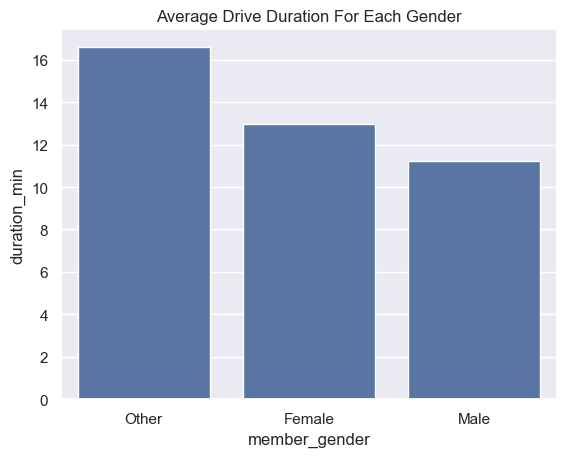

In [30]:
#batplot to show the difference between genders in drive duration average: -

sb.barplot(data = avg_min, x = 'member_gender', y = 'duration_min', color = base_color);
plt.title('Average Drive Duration For Each Gender')

The result was unexpected. It turns out that even though male adults are the most users, they're also the lowest drive duration average users. Although other genders use Bike Share less than males, but when they do, they go for a longer drive.

In [31]:
avg_type = df.groupby('user_type', as_index=False).mean().sort_values(by='duration_min', ascending=False)

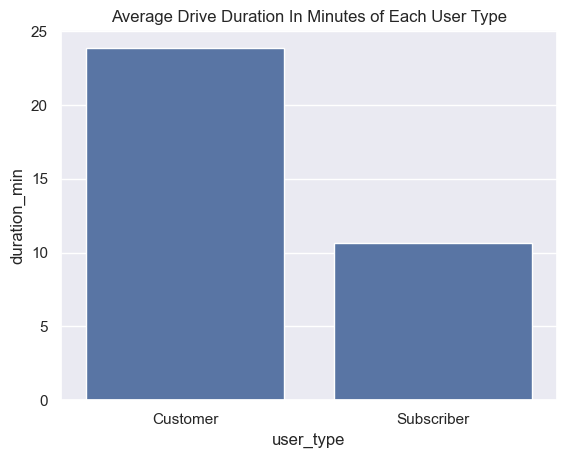

In [32]:
#another bar plot to show duration_min of user_type: -
sb.barplot(data = avg_type, x = 'user_type', y = 'duration_min', color = base_color);
plt.title('Average Drive Duration In Minutes of Each User Type');

Following up on a previous statement when we said Customers use Bike Share in urgent cases only. It looks like those urgent cases require a much longer drive duration than the usual drive locations of Subscribers.

I would like to make one last plot between gender and user type to see how customers are distributed between genders.  

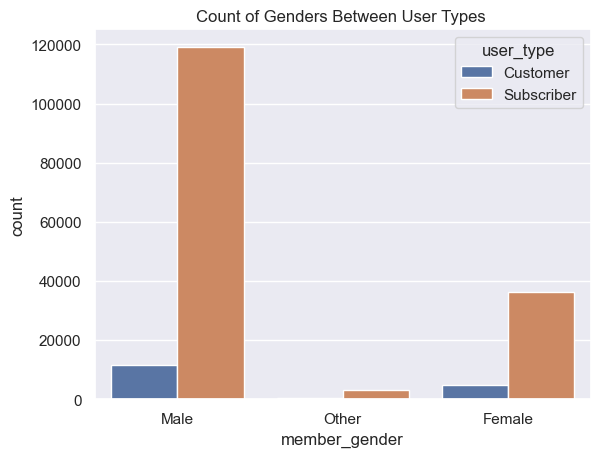

In [33]:
sb.countplot(data = df, x = 'member_gender', hue = 'user_type')
plt.title('Count of Genders Between User Types ');

Nothing worth mentioning in this plot. There are almost no customers from Other genders. and male, subscriber adults are peaking as expected.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> When we look at each relationship, we discover more facts about the dataset that would not be discovered if we stopped at one point. For instance, I noticed that male subscribers have more trips than any other users. However, female and other users have more average drive duration than males. 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relation that cought my attention is the fact that customers have much longer average drive duration than subscribers.
We can make a guess of the reason, but aventually, this need an in-field investegation to find a percise, detailed answer to.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

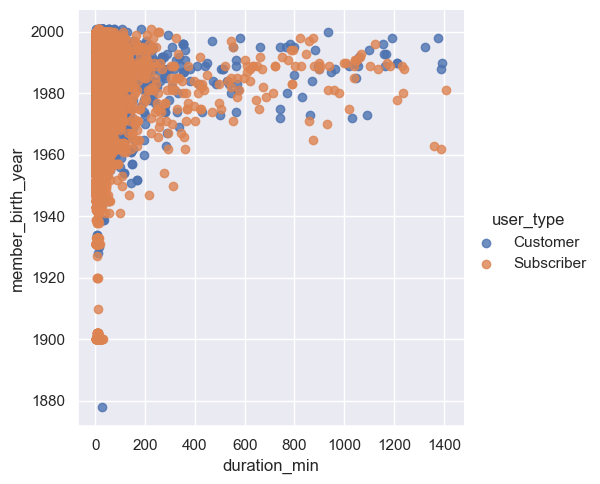

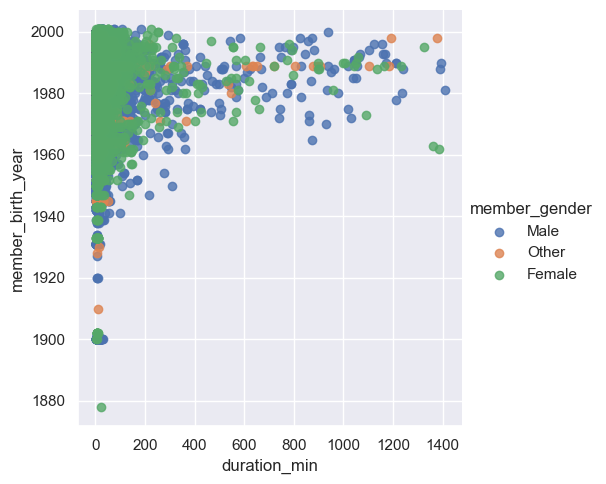

In [34]:


g_type = sb.FacetGrid(data = df_strdate, hue = 'user_type', height = 5)
g_type.map(sb.regplot, 'duration_min', 'member_birth_year', fit_reg=False)
g_type.add_legend();

g_gender = sb.FacetGrid(data = df_strdate, hue = 'member_gender', height = 5)
g_gender.map(sb.regplot, 'duration_min', 'member_birth_year', fit_reg=False)
g_gender.add_legend();


We already know that male users are far more than other genders, but let's zoom in each day within February to look for days where other genders passed, or equalled, males.

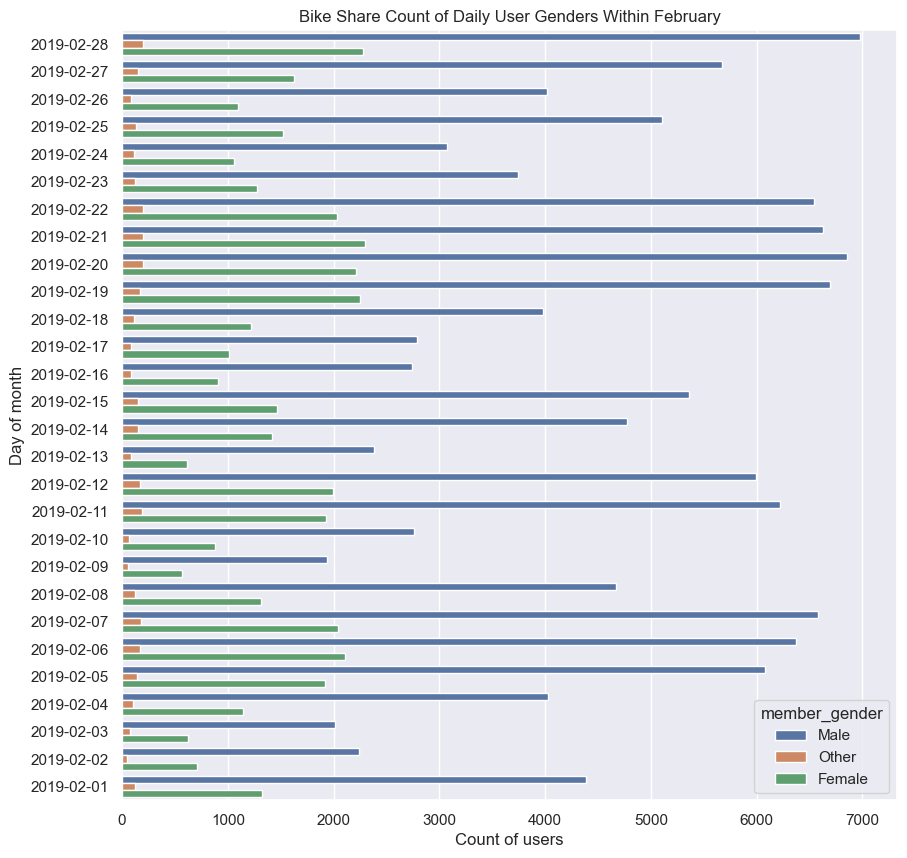

In [35]:
plt.figure(figsize = [10, 10])
sb.countplot(data = df_strdate, y = 'start_time',  hue = 'member_gender')
plt.xlabel('Count of users')
plt.ylabel('Day of month')
plt.title('Bike Share Count of Daily User Genders Within February');

I was looking for at least one day where any other gender passed males, but the plot says otherwise. In day 17 (which is the day of highest average drive duration in the previous line plot.), the genders recorded their closest counts between each other.

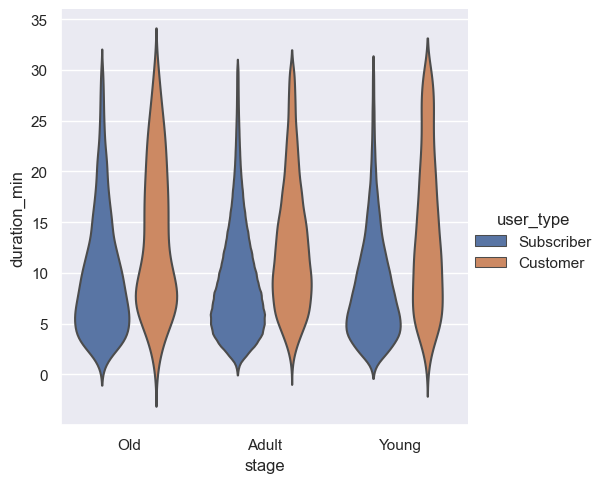

In [36]:
sb.catplot(data=vio_plot30, x="stage", y="duration_min", hue = 'user_type', kind="violin", inner = None);

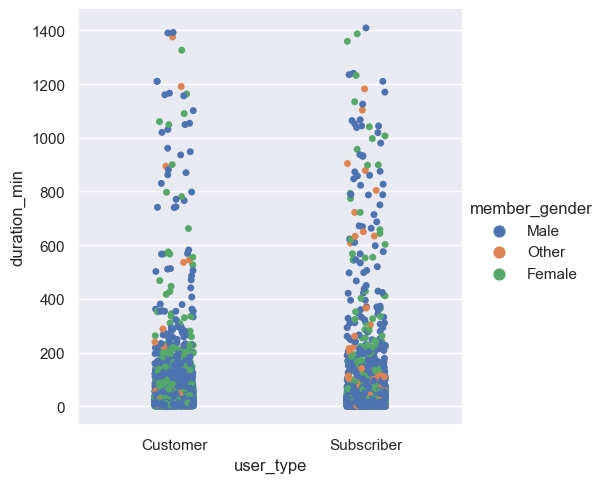

In [37]:
sb.catplot(data=df_strdate, x="user_type", y="duration_min", hue = 'member_gender');

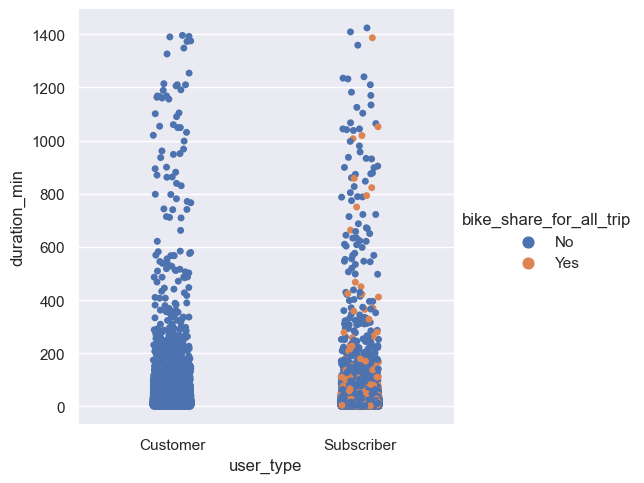

In [38]:
sb.catplot(data=df_strdate, x="user_type", y="duration_min", hue = 'bike_share_for_all_trip');

Multivariate plots above have shown what we all predicted in previous ones. Male adult subscribers are the most users of Bike Share. in terms of long trips, Customers record a relatively higher count than subscribers. However, customers have almost no record of a full trip.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the bi section, we figured that male subscribers are the most users. Now, it was interesting to see the distribution of those male subscribers in terms of age, day of month count, and if it was full trip or not.

### Were there any interesting or surprising interactions between features?

> I was surprised that there are almost no records of Customers go for the full trip.

## Conclusions
To sum up, all kinds of people make their own use of Bike Share depending on their gender, age, and goals. For instance, adults from both genders use Bike Share to eventually arrive to work, while Old people use it for practice or excercise. The data contain a much more facts to be uncovered. 
